In [1]:
%env TF_USE_LEGACY_KERAS 1
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets, svm, metrics
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model
# import keras
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import math
from tensorflow.keras.optimizers import Adam

from dataset_utils import add_noise

import matplotlib
#from labellines import labelLine, labelLines
# import seaborn as sns
import os
import glob
from sklearn.model_selection import train_test_split

import datetime

env: TF_USE_LEGACY_KERAS=1


2025-07-08 16:10:56.622870: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-08 16:10:56.622982: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-08 16:10:56.624386: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-08 16:10:56.630560: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
### GET THE TRAIN/VAL DATA ###
import os

print("=============================")
train_dir = '/uscms/home/bweiss/nobackup/smart-pixels/dataset_3s_50x12P5_parquets/train_test_3s/80eNoise'
X_train  = pd.read_csv(os.path.join(train_dir, 'FullPrecisionInputTrainSet.csv'))
y_train = pd.read_csv(os.path.join(train_dir, 'TrainSetLabel.csv'))

test_dir = '/uscms/home/bweiss/nobackup/smart-pixels/dataset_2s_50x12P5_parquets/train_test_2s/80eNoise'
X_test  = pd.read_csv(os.path.join(test_dir, 'FullPrecisionInputTestSet.csv'))
y_test = pd.read_csv(os.path.join(test_dir, 'TestSetLabel.csv'))

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

''' Uncomment these to add noise '''
#X_train = add_noise(X_train, 0, 80, integrate=False) 
#X_test = add_noise(X_test, 0, 80, integrate=False) 


# print("X-train, X-test, Y-train, Y-test shapes = ",X_train.shape, X_test.shape, y_train.shape, y_test.shape)
''' Rescale variables to be in [-1,1] '''
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

2025-07-08 16:11:12.055045


2025-07-08 16:11:12.094213: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-08 16:11:12.133304: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-08 16:11:12.133694: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/200


2025-07-08 16:11:23.303442: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-07-08 16:11:23.318749: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


107/107 [==============================] - 12s 8ms/step - loss: 0.9269 - sparse_categorical_accuracy: 0.5711 - val_loss: 0.8492 - val_sparse_categorical_accuracy: 0.6279
Epoch 2/200
107/107 [==============================] - 0s 5ms/step - loss: 0.8040 - sparse_categorical_accuracy: 0.6629 - val_loss: 0.7645 - val_sparse_categorical_accuracy: 0.6863
Epoch 3/200
107/107 [==============================] - 0s 4ms/step - loss: 0.7366 - sparse_categorical_accuracy: 0.7067 - val_loss: 0.7145 - val_sparse_categorical_accuracy: 0.7151
Epoch 4/200
107/107 [==============================] - 0s 4ms/step - loss: 0.6966 - sparse_categorical_accuracy: 0.7311 - val_loss: 0.6841 - val_sparse_categorical_accuracy: 0.7389
Epoch 5/200
107/107 [==============================] - 1s 5ms/step - loss: 0.6697 - sparse_categorical_accuracy: 0.7449 - val_loss: 0.6643 - val_sparse_categorical_accuracy: 0.7447
Epoch 6/200
107/107 [==============================] - 0s 4ms/step - loss: 0.6497 - sparse_categorical_acc

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2040216
2040216 2040216 2040216
Unphysical hist content:  [1.46069e+05 3.10224e+05 3.13378e+05 2.70617e+05 2.16202e+05 1.69019e+05
 1.28895e+05 9.88210e+04 7.53290e+04 5.80740e+04 4.47350e+04 3.53160e+04
 2.78370e+04 2.24110e+04 1.81340e+04 1.53540e+04 1.30710e+04 1.11400e+04
 9.39000e+03 8.01900e+03 6.74000e+03 5.81300e+03 4.89000e+03 4.21900e+03
 3.54600e+03 3.03500e+03 2.74300e+03 2.26400e+03 1.90200e+03 1.68200e+03
 1.38400e+03 1.26400e+03 1.17100e+03 9.49000e+02 8.68000e+02 7.46000e+02
 6.51000e+02 5.73000e+02 5.34000e+02 4.39000e+02 4.03000e+02 3.97000e+02
 3.22000e+02 2.95000e+02 2.93000e+02 2.61000e+02 2.31000e+02 2.28000e+02
 1.58000e+02 1.80000e+02]
r =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
nse =  48181.0
Signal efficiency = 92.64%
Background rejection = 32.00%
Data reduction = 31.42%
Epoch 1/200
107/107 [==============================] - 2s 6ms/step - loss: 0.

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2040216
2040216 2040216 2040216
Unphysical hist content:  [1.46069e+05 3.10224e+05 3.13378e+05 2.70617e+05 2.16202e+05 1.69019e+05
 1.28895e+05 9.88210e+04 7.53290e+04 5.80740e+04 4.47350e+04 3.53160e+04
 2.78370e+04 2.24110e+04 1.81340e+04 1.53540e+04 1.30710e+04 1.11400e+04
 9.39000e+03 8.01900e+03 6.74000e+03 5.81300e+03 4.89000e+03 4.21900e+03
 3.54600e+03 3.03500e+03 2.74300e+03 2.26400e+03 1.90200e+03 1.68200e+03
 1.38400e+03 1.26400e+03 1.17100e+03 9.49000e+02 8.68000e+02 7.46000e+02
 6.51000e+02 5.73000e+02 5.34000e+02 4.39000e+02 4.03000e+02 3.97000e+02
 3.22000e+02 2.95000e+02 2.93000e+02 2.61000e+02 2.31000e+02 2.28000e+02
 1.58000e+02 1.80000e+02]
r =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
nse =  48181.0
Signal efficiency = 92.36%
Background rejection = 31.90%
Data reduction = 31.33%
Epoch 1/200
107/107 [==============================] - 5s 18ms/step - loss: 0

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2040216
2040216 2040216 2040216
Unphysical hist content:  [1.46069e+05 3.10224e+05 3.13378e+05 2.70617e+05 2.16202e+05 1.69019e+05
 1.28895e+05 9.88210e+04 7.53290e+04 5.80740e+04 4.47350e+04 3.53160e+04
 2.78370e+04 2.24110e+04 1.81340e+04 1.53540e+04 1.30710e+04 1.11400e+04
 9.39000e+03 8.01900e+03 6.74000e+03 5.81300e+03 4.89000e+03 4.21900e+03
 3.54600e+03 3.03500e+03 2.74300e+03 2.26400e+03 1.90200e+03 1.68200e+03
 1.38400e+03 1.26400e+03 1.17100e+03 9.49000e+02 8.68000e+02 7.46000e+02
 6.51000e+02 5.73000e+02 5.34000e+02 4.39000e+02 4.03000e+02 3.97000e+02
 3.22000e+02 2.95000e+02 2.93000e+02 2.61000e+02 2.31000e+02 2.28000e+02
 1.58000e+02 1.80000e+02]
r =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
nse =  48181.0
Signal efficiency = 91.75%
Background rejection = 32.62%
Data reduction = 32.05%
Epoch 1/200
107/107 [==============================] - 2s 6ms/step - loss: 0.

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2040216
2040216 2040216 2040216
Unphysical hist content:  [1.46069e+05 3.10224e+05 3.13378e+05 2.70617e+05 2.16202e+05 1.69019e+05
 1.28895e+05 9.88210e+04 7.53290e+04 5.80740e+04 4.47350e+04 3.53160e+04
 2.78370e+04 2.24110e+04 1.81340e+04 1.53540e+04 1.30710e+04 1.11400e+04
 9.39000e+03 8.01900e+03 6.74000e+03 5.81300e+03 4.89000e+03 4.21900e+03
 3.54600e+03 3.03500e+03 2.74300e+03 2.26400e+03 1.90200e+03 1.68200e+03
 1.38400e+03 1.26400e+03 1.17100e+03 9.49000e+02 8.68000e+02 7.46000e+02
 6.51000e+02 5.73000e+02 5.34000e+02 4.39000e+02 4.03000e+02 3.97000e+02
 3.22000e+02 2.95000e+02 2.93000e+02 2.61000e+02 2.31000e+02 2.28000e+02
 1.58000e+02 1.80000e+02]
r =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
nse =  48181.0
Signal efficiency = 90.84%
Background rejection = 34.16%
Data reduction = 33.57%
Epoch 1/200
107/107 [==============================] - 2s 6ms/step - loss: 0.

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2040216
2040216 2040216 2040216
Unphysical hist content:  [1.46069e+05 3.10224e+05 3.13378e+05 2.70617e+05 2.16202e+05 1.69019e+05
 1.28895e+05 9.88210e+04 7.53290e+04 5.80740e+04 4.47350e+04 3.53160e+04
 2.78370e+04 2.24110e+04 1.81340e+04 1.53540e+04 1.30710e+04 1.11400e+04
 9.39000e+03 8.01900e+03 6.74000e+03 5.81300e+03 4.89000e+03 4.21900e+03
 3.54600e+03 3.03500e+03 2.74300e+03 2.26400e+03 1.90200e+03 1.68200e+03
 1.38400e+03 1.26400e+03 1.17100e+03 9.49000e+02 8.68000e+02 7.46000e+02
 6.51000e+02 5.73000e+02 5.34000e+02 4.39000e+02 4.03000e+02 3.97000e+02
 3.22000e+02 2.95000e+02 2.93000e+02 2.61000e+02 2.31000e+02 2.28000e+02
 1.58000e+02 1.80000e+02]
r =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
nse =  48181.0
Signal efficiency = 92.40%
Background rejection = 31.98%
Data reduction = 31.41%
Epoch 1/200
107/107 [==============================] - 2s 7ms/step - loss: 0.

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2040216
2040216 2040216 2040216
Unphysical hist content:  [1.46069e+05 3.10224e+05 3.13378e+05 2.70617e+05 2.16202e+05 1.69019e+05
 1.28895e+05 9.88210e+04 7.53290e+04 5.80740e+04 4.47350e+04 3.53160e+04
 2.78370e+04 2.24110e+04 1.81340e+04 1.53540e+04 1.30710e+04 1.11400e+04
 9.39000e+03 8.01900e+03 6.74000e+03 5.81300e+03 4.89000e+03 4.21900e+03
 3.54600e+03 3.03500e+03 2.74300e+03 2.26400e+03 1.90200e+03 1.68200e+03
 1.38400e+03 1.26400e+03 1.17100e+03 9.49000e+02 8.68000e+02 7.46000e+02
 6.51000e+02 5.73000e+02 5.34000e+02 4.39000e+02 4.03000e+02 3.97000e+02
 3.22000e+02 2.95000e+02 2.93000e+02 2.61000e+02 2.31000e+02 2.28000e+02
 1.58000e+02 1.80000e+02]
r =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
nse =  48181.0
Signal efficiency = 92.73%
Background rejection = 31.43%
Data reduction = 30.86%
Epoch 1/200
107/107 [==============================] - 2s 6ms/step - loss: 0.

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2040216
2040216 2040216 2040216
Unphysical hist content:  [1.46069e+05 3.10224e+05 3.13378e+05 2.70617e+05 2.16202e+05 1.69019e+05
 1.28895e+05 9.88210e+04 7.53290e+04 5.80740e+04 4.47350e+04 3.53160e+04
 2.78370e+04 2.24110e+04 1.81340e+04 1.53540e+04 1.30710e+04 1.11400e+04
 9.39000e+03 8.01900e+03 6.74000e+03 5.81300e+03 4.89000e+03 4.21900e+03
 3.54600e+03 3.03500e+03 2.74300e+03 2.26400e+03 1.90200e+03 1.68200e+03
 1.38400e+03 1.26400e+03 1.17100e+03 9.49000e+02 8.68000e+02 7.46000e+02
 6.51000e+02 5.73000e+02 5.34000e+02 4.39000e+02 4.03000e+02 3.97000e+02
 3.22000e+02 2.95000e+02 2.93000e+02 2.61000e+02 2.31000e+02 2.28000e+02
 1.58000e+02 1.80000e+02]
r =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
nse =  48181.0
Signal efficiency = 92.78%
Background rejection = 31.71%
Data reduction = 31.13%
Epoch 1/200
107/107 [==============================] - 2s 6ms/step - loss: 0.

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2040216
2040216 2040216 2040216
Unphysical hist content:  [1.46069e+05 3.10224e+05 3.13378e+05 2.70617e+05 2.16202e+05 1.69019e+05
 1.28895e+05 9.88210e+04 7.53290e+04 5.80740e+04 4.47350e+04 3.53160e+04
 2.78370e+04 2.24110e+04 1.81340e+04 1.53540e+04 1.30710e+04 1.11400e+04
 9.39000e+03 8.01900e+03 6.74000e+03 5.81300e+03 4.89000e+03 4.21900e+03
 3.54600e+03 3.03500e+03 2.74300e+03 2.26400e+03 1.90200e+03 1.68200e+03
 1.38400e+03 1.26400e+03 1.17100e+03 9.49000e+02 8.68000e+02 7.46000e+02
 6.51000e+02 5.73000e+02 5.34000e+02 4.39000e+02 4.03000e+02 3.97000e+02
 3.22000e+02 2.95000e+02 2.93000e+02 2.61000e+02 2.31000e+02 2.28000e+02
 1.58000e+02 1.80000e+02]
r =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
nse =  48181.0
Signal efficiency = 92.78%
Background rejection = 31.60%
Data reduction = 31.02%
Epoch 1/200
107/107 [==============================] - 2s 6ms/step - loss: 0.

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2040216
2040216 2040216 2040216
Unphysical hist content:  [1.46069e+05 3.10224e+05 3.13378e+05 2.70617e+05 2.16202e+05 1.69019e+05
 1.28895e+05 9.88210e+04 7.53290e+04 5.80740e+04 4.47350e+04 3.53160e+04
 2.78370e+04 2.24110e+04 1.81340e+04 1.53540e+04 1.30710e+04 1.11400e+04
 9.39000e+03 8.01900e+03 6.74000e+03 5.81300e+03 4.89000e+03 4.21900e+03
 3.54600e+03 3.03500e+03 2.74300e+03 2.26400e+03 1.90200e+03 1.68200e+03
 1.38400e+03 1.26400e+03 1.17100e+03 9.49000e+02 8.68000e+02 7.46000e+02
 6.51000e+02 5.73000e+02 5.34000e+02 4.39000e+02 4.03000e+02 3.97000e+02
 3.22000e+02 2.95000e+02 2.93000e+02 2.61000e+02 2.31000e+02 2.28000e+02
 1.58000e+02 1.80000e+02]
r =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
nse =  48181.0
Signal efficiency = 91.25%
Background rejection = 33.84%
Data reduction = 33.25%
Epoch 1/200
107/107 [==============================] - 2s 6ms/step - loss: 0.

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2040216
2040216 2040216 2040216
Unphysical hist content:  [1.46069e+05 3.10224e+05 3.13378e+05 2.70617e+05 2.16202e+05 1.69019e+05
 1.28895e+05 9.88210e+04 7.53290e+04 5.80740e+04 4.47350e+04 3.53160e+04
 2.78370e+04 2.24110e+04 1.81340e+04 1.53540e+04 1.30710e+04 1.11400e+04
 9.39000e+03 8.01900e+03 6.74000e+03 5.81300e+03 4.89000e+03 4.21900e+03
 3.54600e+03 3.03500e+03 2.74300e+03 2.26400e+03 1.90200e+03 1.68200e+03
 1.38400e+03 1.26400e+03 1.17100e+03 9.49000e+02 8.68000e+02 7.46000e+02
 6.51000e+02 5.73000e+02 5.34000e+02 4.39000e+02 4.03000e+02 3.97000e+02
 3.22000e+02 2.95000e+02 2.93000e+02 2.61000e+02 2.31000e+02 2.28000e+02
 1.58000e+02 1.80000e+02]
r =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
nse =  48181.0
Signal efficiency = 93.23%
Background rejection = 31.07%
Data reduction = 30.50%
2025-07-08 17:08:05.438722


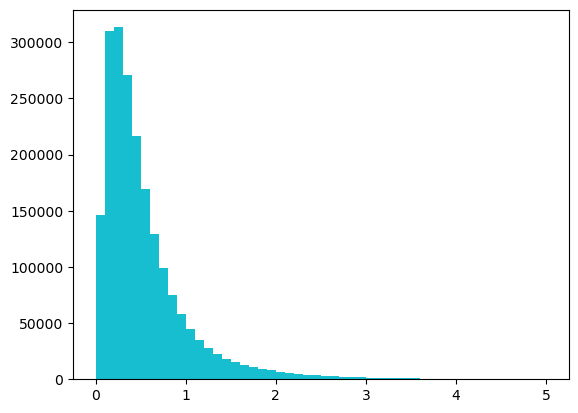

In [3]:
print(datetime.datetime.now())
seeds = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
histories = []
for i, seed in enumerate(seeds):
    tf.random.set_seed(seed) #change for each training
    if i > 9:
        break
    
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(14,)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(),
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), # default from_logits=False
                  metrics=[keras.metrics.SparseCategoricalAccuracy()])
    
    
    es = EarlyStopping(monitor='val_sparse_categorical_accuracy', 
                                       mode='max', # don't minimize the accuracy!
                                       patience=20,
                                       restore_best_weights=True)
    
    history = model.fit(X_train,
                        y_train,
                        callbacks=[es],
                        epochs=200, 
                        batch_size=1024,
                        validation_split=0.2,
                        shuffle=True,
                        verbose=1)
    
    histories.append(history)
    s = '80eNoise' #'80eNoise'+str(seed)
    #history_dict = histories[i].history
    #loss_values = history_dict['loss'] 
    #val_loss_values = history_dict['val_loss'] 
    #epochs = range(1, len(loss_values) + 1) 
    
    #plt.plot(epochs, loss_values, 'bo', label='Training loss')
    #plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
    #plt.title('Training and validation loss')
    #plt.xlabel('Epochs')
    #plt.ylabel('Loss')
    #plt.legend()
    #plt.savefig(f'/Filterloss_{s}.png')
    #plt.close()
    
    #acc = history.history['sparse_categorical_accuracy']
    #val_acc = history.history['val_sparse_categorical_accuracy']
    #epochs = range(1, len(acc) + 1)
    
    #plt.plot(epochs, acc, 'bo', label='Training accuracy')
    #plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
    #plt.title('Training and validation accuracy')
    #plt.xlabel('Epochs')
    #plt.ylabel('Accuracy')
    #plt.legend()
    # np.max(val_acc)
    #plt.savefig(f'./accuracy_{s}.png')
    #plt.close()
    preds = model.predict(X_test) 
    predictionsFiles = np.argmax(preds, axis=1)
    #dont need to loop these
    pd.DataFrame(predictionsFiles).to_csv(f"./predictionsFiles_{s}.csv",header='predict', index=False)                #
    pd.DataFrame(y_test).to_csv(f"./testResults_{s}.csv",header='true', index=False)                                  #
    #plt.hist(y_test, bins=30)
    #plt.show()
    #plt.close()
    score = model.evaluate(X_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    
    #disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictionsFiles)
    #disp.figure_.suptitle("Multiclassifier Confusion Matrix")
    #print(f"Confusion matrix:\n{disp.confusion_matrix}")
    #plt.savefig(f'./confusionMatrix_{s}.png')
    #plt.show()
    #plt.close()
    model.save_weights(f'./weights/trained_model_{s}_weights.h5')
    model.save(f'./weights/trained_model_{s}.h5')

    # threshold = 0.2
    # sensor_geom = sensor_iter
    print("=============================")
    # print("Analyzing run "+str(run_iter)+": Sensor geometry ",sensor_geom," at pT boundary = ",threshold)
    train_dir = '/uscms/home/bweiss/nobackup/smart-pixels/dataset_2s_50x12P5_parquets/train_test_2s/80eNoise'
    
    mergePosNeg = pd.read_csv(os.path.join(train_dir, "FullTestData.csv"))
    
    # True pT distribution (physical no sign)
    h_physical = plt.hist(abs(mergePosNeg['pt']),bins=np.linspace(0,5,51),histtype='stepfilled');
    #             the cutoff where commenting out might make things weird
    # weight per pT bin
    #print("Physical hist content: ",h_physical[0])
    w_physical = h_physical[0]/np.sum(h_physical[0])
    
    df1 = pd.read_csv(os.path.join(train_dir,'TestSetPt.csv'))
    print(len(df1))
    # _, df1 = train_test_split(df1,test_size = 0.20, shuffle=False)
    df1 = df1.reset_index(drop=True)
    df2 = pd.read_csv('./predictionsFiles_80eNoise.csv')                 #
    df3 = pd.read_csv('./testResults_80eNoise.csv')                      #
    df2.columns.values[0] = "predict"
    df3.columns.values[0] = "true"
    print(len(df1),len(df2), len(df3))
    df2['predict'] = df2['predict'].astype(int)
    concatenate = pd.concat([df1, df2, df3], axis=1)
    concatenate.head()

    # Unphysical pT distribution (no sign)
    h_unphysical = plt.hist(abs(concatenate['pt']),bins=np.linspace(0,5,51),histtype='stepfilled');
    w_unphysical = h_unphysical[0]/np.sum(h_unphysical[0])
    print("Unphysical hist content: ",h_unphysical[0])
    
    # weight each bin up by physical weight, down by unphysical weight
    r = w_physical/w_unphysical
    print("r = ",r)
    
    # Unphysical pT distribution of rejected clusters only
    h_reject = plt.hist(abs(concatenate[concatenate['predict']>0]['pt']),bins=np.linspace(0,5,51))
    np.sum(h_reject[0]*r)/np.sum(h_unphysical[0]*r)
    
    # Unphysical pT distribution of true low pT clusters
    h_lowpt = plt.hist(abs(concatenate[concatenate['true']>0]['pt']),bins=np.linspace(0,5,51))
    np.sum(h_lowpt[0]*r)/np.sum(h_unphysical[0]*r)
    
    # Unphysical pT distribution of true low pT clusters
    h_lowpt = plt.hist(abs(concatenate[abs(concatenate['pt'])<2]['pt']),bins=np.linspace(0,5,51))
    np.sum(h_lowpt[0]*r)/np.sum(h_unphysical[0]*r)
    
    len(mergePosNeg[abs(mergePosNeg['pt'])<2.0])/len(mergePosNeg['pt'])

    
    
    h_trulyEfficient = plt.hist(abs(concatenate[abs(concatenate['pt'])>2]['pt']),bins=np.linspace(0,5,51),histtype='stepfilled', label='True pT distrib. < 2GeV');
    h_efficiency = plt.hist(abs(concatenate[(abs(concatenate['pt'])>2) & (concatenate['predict']==0)]['pt']),bins=np.linspace(0,5,51), label='Predicted high pT events > 2GeV')
    #plt.legend()
    #plt.show()
    sig_eff = np.sum(h_efficiency[0]*r)/np.sum(h_trulyEfficient[0]*r)
    Nse = np.sum(h_trulyEfficient[0])
    print("nse = ",Nse)
    sig_eff_err = np.sqrt(sig_eff*(1-sig_eff)/Nse)
    print("Signal efficiency = {:.2f}%".format(100*np.sum(h_efficiency[0]*r)/np.sum(h_trulyEfficient[0]*r)))
    
    h_trulyRejected = plt.hist(abs(concatenate[abs(concatenate['pt'])<2]['pt']),bins=np.linspace(0,5,51),histtype='stepfilled', label='True pT distrib. < 2GeV');
    h_rejected = plt.hist(abs(concatenate[(abs(concatenate['pt'])<2) & (concatenate['predict']>0)]['pt']),bins=np.linspace(0,5,51), label='Predicted high pT events > 2GeV')
    #plt.legend()
    #plt.show()
    bg_rej = np.sum(h_rejected[0]*r)/np.sum(h_trulyRejected[0]*r)
    Nbg = np.sum(h_trulyRejected[0])
    bg_rej_err = np.sqrt(bg_rej*(1-bg_rej)/Nbg)
    print("Background rejection = {:.2f}%".format(100*np.sum(h_rejected[0]*r)/np.sum(h_trulyRejected[0]*r)))
    
    # Data reduction value
    h_reduction = plt.hist(abs(concatenate[concatenate['predict']>0]['pt']),bins=np.linspace(0,5,51))
    h_unphysical = plt.hist(abs(concatenate['pt']),bins=np.linspace(0,5,51),histtype='stepfilled')
    #plt.legend()
    #plt.show()
    dat_red = np.sum(h_reduction[0]*r)/np.sum(h_unphysical[0]*r)
    Ndr = np.sum(h_unphysical[0])
    dat_red_err = np.sqrt(dat_red*(1-dat_red)/Ndr)
    print("Data reduction = {:.2f}%".format(100*np.sum(h_reduction[0]*r)/np.sum(h_unphysical[0]*r)))
    
    with open('./final_results_80eNoise.txt', 'a') as file:
        file.write(str(i)+','+str(sig_eff)+','+str(sig_eff_err)+','+str(bg_rej)+','+str(bg_rej_err)+','+ str(dat_red)+','+str(dat_red_err)+'\n')
        #or file.write(str(i)+', sig eff: '+str(sig_eff)+', sig eff err: '+str(sig_eff_err)+', bg rej: '+str(bg_rej)+', bg rej err: '+str(bg_rej_err)+', dat red: '+ str(dat_red)+', dat red err: '+str(dat_red_err)+'\n')
print(datetime.datetime.now())